In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Load CSV
df = pd.read_csv('./19.csv')

print("Dataset Shape:", df.shape)
print("Data Types:\n", df.dtypes)
df.head()


Dataset Shape: (5000, 14)
Data Types:
 enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
will_change_career          int64
dtype: object


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,will_change_career
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,0,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,0,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [12]:
# --- Dataset Overview ---
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe(include='all'))

# Count of missing values
print("\nMissing Values (per column):")
print(df.isnull().sum())

# Duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

# Datatypes
print("\nData Types:\n", df.dtypes.value_counts())

# --- Unique Values per Column ---
print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Dataset Shape: (5000, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             5000 non-null   int64  
 1   city                    5000 non-null   object 
 2   city_development_index  5000 non-null   float64
 3   gender                  3887 non-null   object 
 4   relevent_experience     5000 non-null   object 
 5   enrolled_university     4893 non-null   object 
 6   education_level         4882 non-null   object 
 7   major_discipline        4276 non-null   object 
 8   experience              4989 non-null   object 
 9   company_size            3429 non-null   object 
 10  company_type            3379 non-null   object 
 11  last_new_job            4896 non-null   object 
 12  training_hours          5000 non-null   int64  
 13  will_change_career      5000 non-null   int64  
dtyp

Shape: (5000, 14)

Data Types:
 object     10
int64       3
float64     1
Name: count, dtype: int64

Missing Values:
 enrollee_id                  0
city                         0
city_development_index       0
gender                    1113
relevent_experience          0
enrolled_university        107
education_level            118
major_discipline           724
experience                  11
company_size              1571
company_type              1621
last_new_job               104
training_hours               0
will_change_career           0
dtype: int64

Duplicate Rows: 0

Unique Values per Column:
enrollee_id: 5000
city: 113
city_development_index: 85
gender: 3
relevent_experience: 2
enrolled_university: 3
education_level: 5
major_discipline: 6
experience: 22
company_size: 8
company_type: 6
last_new_job: 6
training_hours: 238
will_change_career: 2

Numerical Summary:
                          count         mean          std    min       25%  \
enrollee_id             5000.0  1702

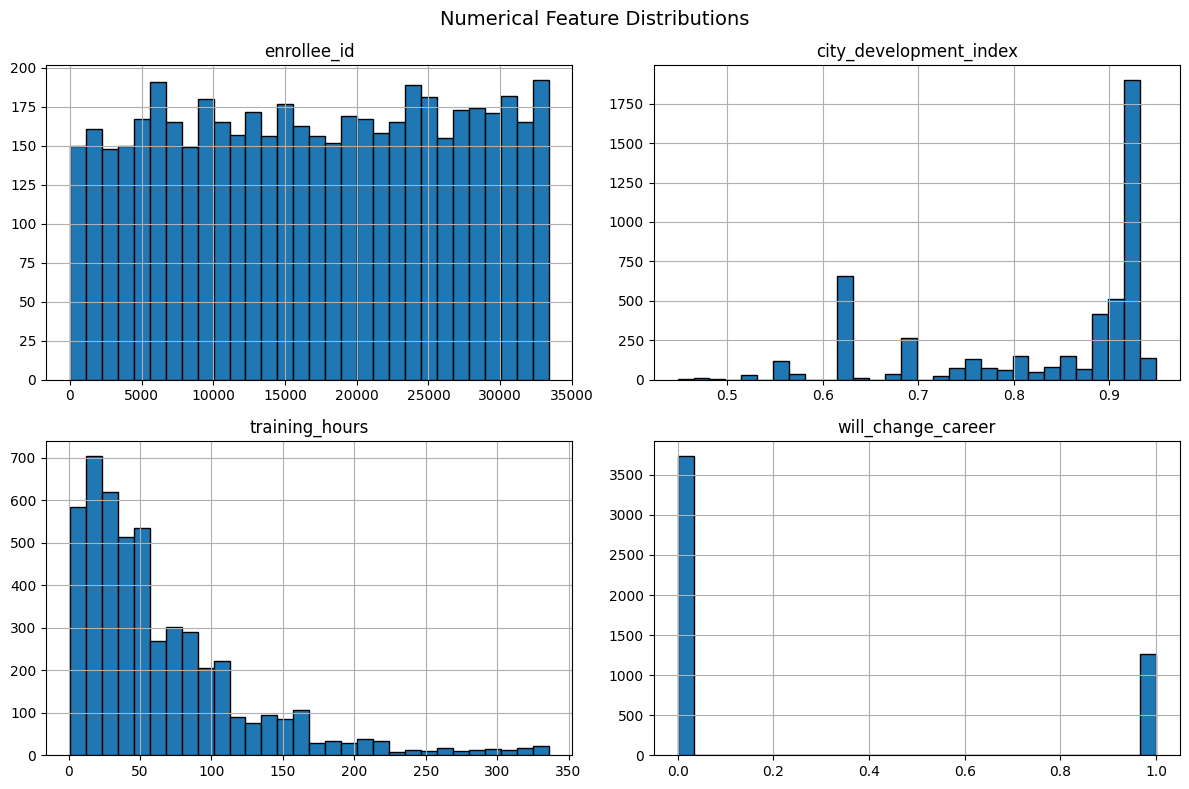

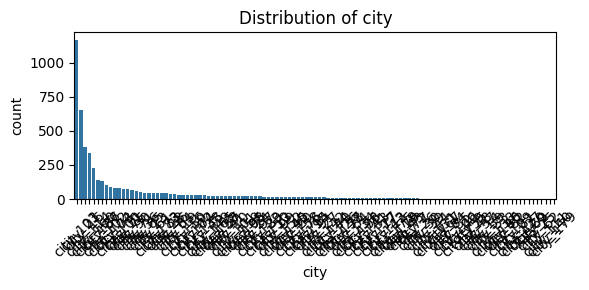

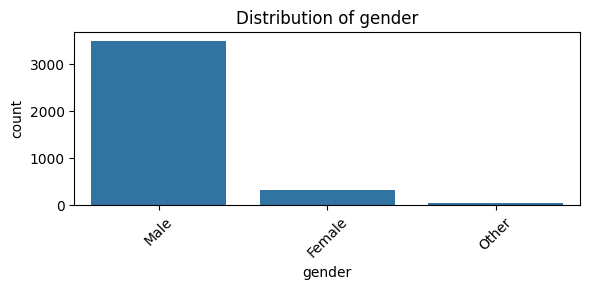

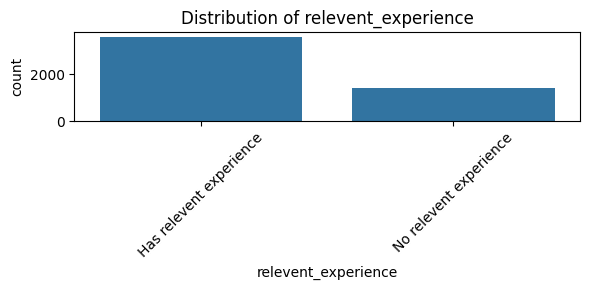

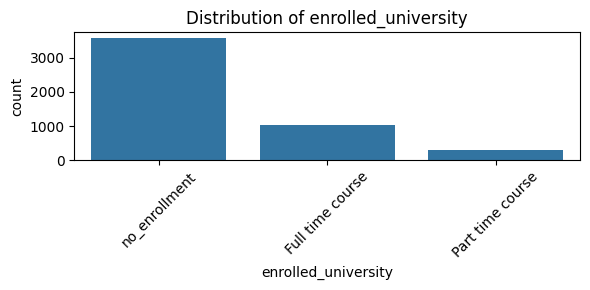

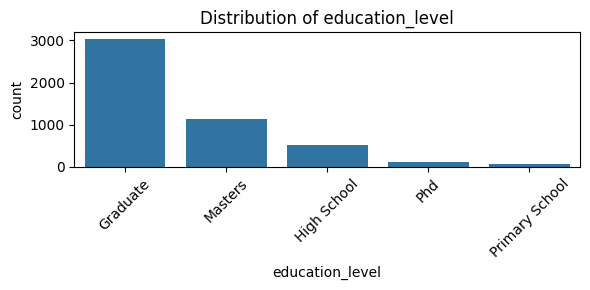

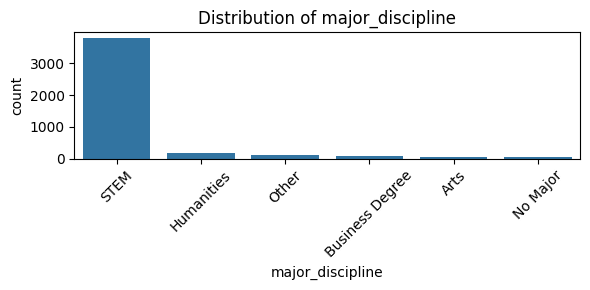

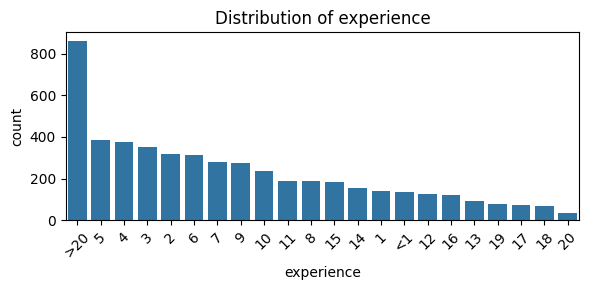

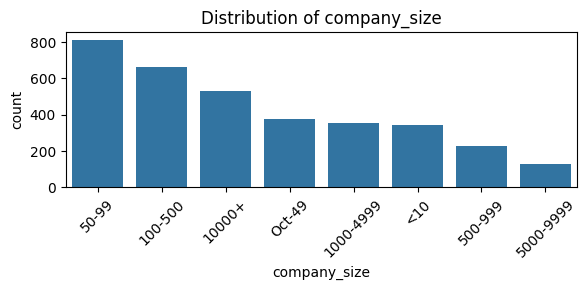

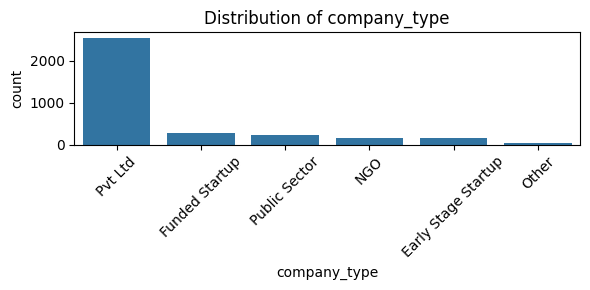

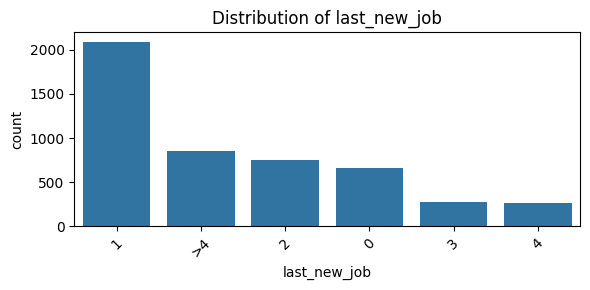

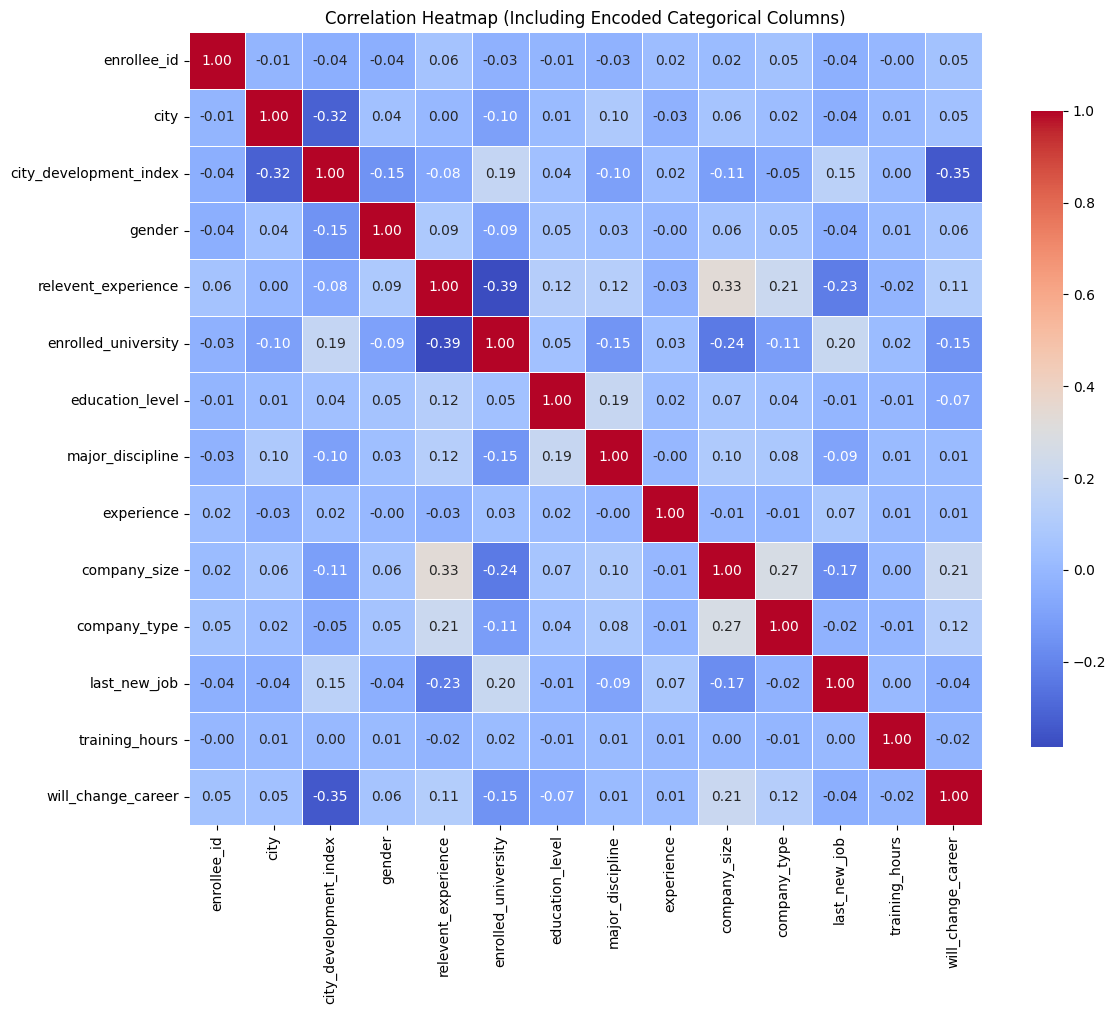

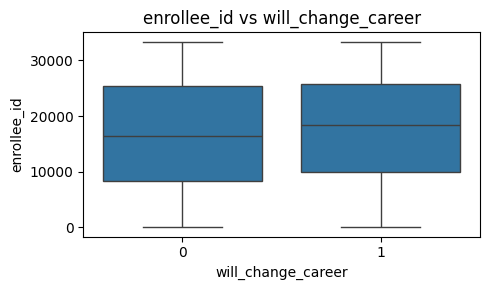

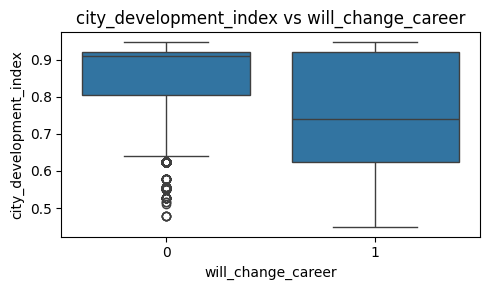

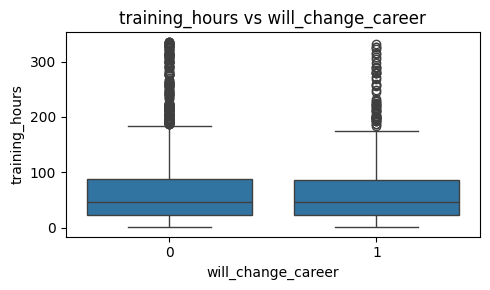

In [ ]:
# --- Basic Info ---
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes.value_counts())
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())
print("\nUnique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

# --- Numerical Summary ---
print("\nNumerical Summary:\n", df.describe().T)

# --- Categorical Summary ---
cat_cols = df.select_dtypes(include=['object', 'category']).columns
if len(cat_cols) > 0:
    print("\nCategorical Summary:")
    for col in cat_cols:
        print(f"\n{col} value counts:\n{df[col].value_counts()}")

# --- Target Info (Replace 'will_change_career' if needed) ---
target = 'will_change_career'
if target in df.columns:
    print("\nTarget Distribution:\n", df[target].value_counts(normalize=True))

# --- Numeric Feature Distribution ---
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
if len(num_cols) > 0:
    df[num_cols].hist(figsize=(12, 8), bins=30, edgecolor='black')
    plt.suptitle("Numerical Feature Distributions", fontsize=14)
    plt.tight_layout()
    plt.show()

# --- Categorical Feature Distribution ---
for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# --- Correlation Heatmap (including encoded categoricals) ---
df_encoded = df.copy()
for col in cat_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap (Including Encoded Categorical Columns)")
plt.tight_layout()
plt.show()

# --- Boxplots vs Target (First 4 Numerical Columns) ---
if target in df.columns:
    for col in num_cols[:4]:
        if col != target:
            plt.figure(figsize=(5, 3))
            sns.boxplot(x=target, y=col, data=df)
            plt.title(f"{col} vs {target}")
            plt.tight_layout()
            plt.show()


In [15]:

if 'enrollee_id' in df.columns:
    df = df.drop(columns=['enrollee_id'])

# Clean 'experience' and 'last_new_job'
df['experience'] = df['experience'].replace({'>20': 21, '<1': 0.5}).astype(float)
df['last_new_job'] = df['last_new_job'].replace({'>4': 5, 'never': 0}).astype(float)

# Fix label error in company_size
# Fix label error in company_size
if 'company_size' in df.columns:
    df['company_size'] = df['company_size'].replace({'<10': '0-10', 'Oct-49': '10-49'})

# Identify columns
target = 'will_change_career'
X = df.drop(columns=[target])
y = df[target]

num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Split categorical columns by cardinality
low_card_cols = [col for col in cat_cols if X[col].nunique() <= 10]
high_card_cols = [col for col in cat_cols if X[col].nunique() > 10]

# Preprocessing pipelines
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

low_card_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

high_card_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_cols),
    ('low_card', low_card_pipeline, low_card_cols),
    ('high_card', high_card_pipeline, high_card_cols)
])

# Fit and transform
X_processed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [16]:
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000)
}

results = {}

for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')  # Use binary/macro/micro based on task
    results[name] = {'confusion_matrix': cm, 'accuracy': acc, 'f1': f1, 'model': model}


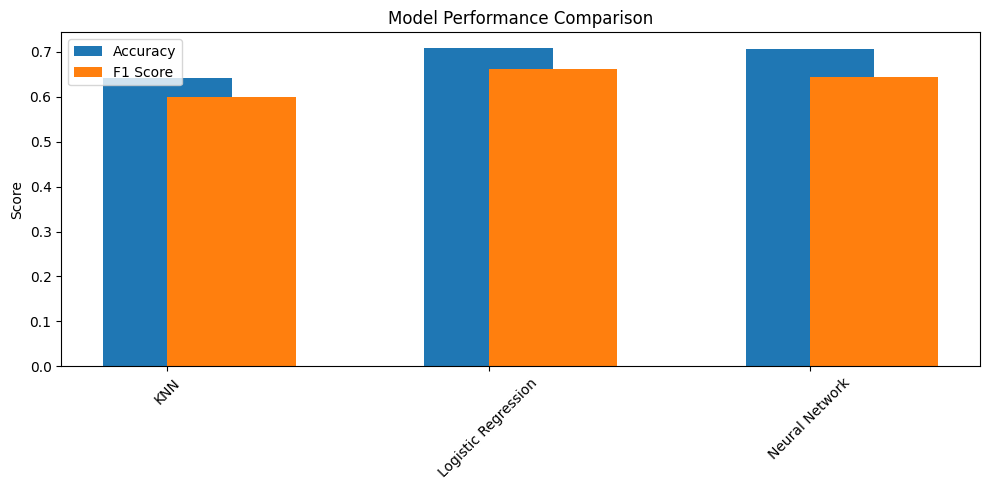

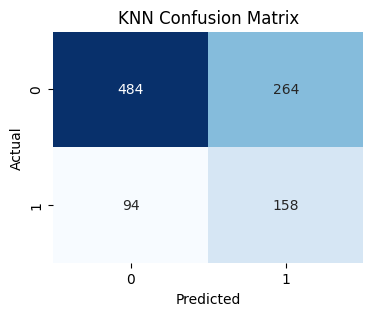

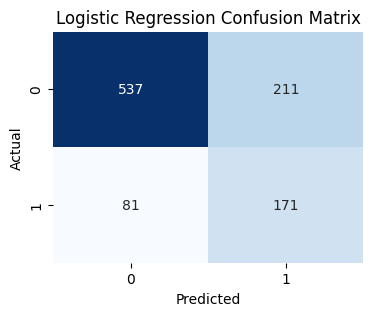

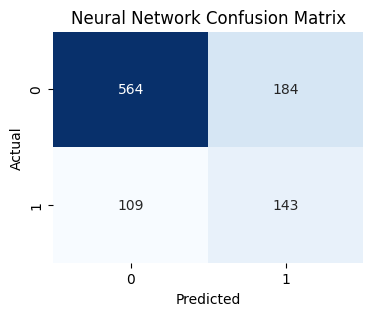

                     Accuracy  Precision    Recall  F1-Score
KNN                     0.642   0.374408  0.626984  0.468843
Logistic Regression     0.708   0.447644  0.678571  0.539432
Neural Network          0.707   0.437309  0.567460  0.493955


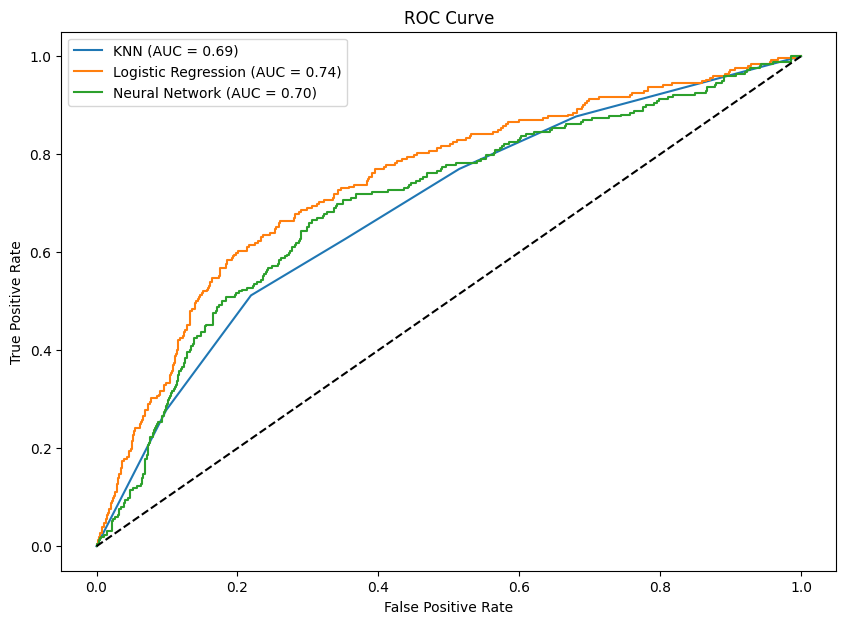

In [17]:
acc_scores = [results[m]['accuracy'] for m in results]
f1_scores = [results[m]['f1'] for m in results]

plt.figure(figsize=(10,5))
x = list(results.keys())
plt.bar(x, acc_scores, width=0.4, label='Accuracy', align='center')
plt.bar(x, f1_scores, width=0.4, label='F1 Score', align='edge')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
for name in results:
    cm = results[name]['confusion_matrix']
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

metrics = []
for name in results:
    y_pred = results[name]['model'].predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    metrics.append([acc, prec, rec, f1])

metrics_df = pd.DataFrame(metrics, columns=["Accuracy", "Precision", "Recall", "F1-Score"],
                         index=["KNN", "Logistic Regression", "Neural Network"])
print(metrics_df)

plt.figure(figsize=(10,7))
for name in results:
    model = results[name]['model']
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")
        
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
